In [1]:
%matplotlib inline

In [2]:
import skimage.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style="color: darkgreen; font-size: 23px; text-align: center" > Oblaka

<p style="color: darkgreen; font-size: 15px; text-align: center" > by Irina Nedyalkova, turning images into matrices

Please, meet Oblaka - the white cat in my garden. Last Autumn I was studying image processing and how to turn images into matrices. By noon I went in the garden to get some sun and to read a good old paper book. Always, there was Oblaka. He enjoyed the sun as much as I did.

Sometimes, I said "Hi" and he answered with "Miaaow". I loved his way of slow walking and distant behaviour.

In [3]:
white_cat_image = plt.imread("oblacho.jpg")

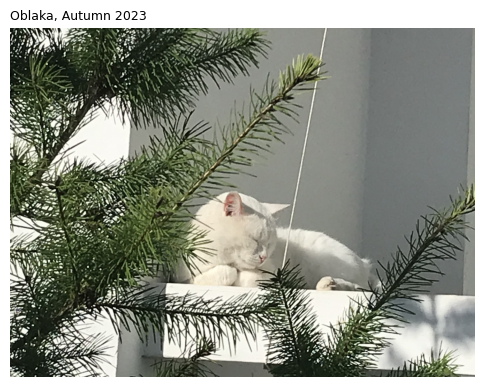

In [4]:
plt.figure(figsize = (6, 5))
plt.title("Oblaka, Autumn 2023", size = 9, loc = "left")
plt.axis("off")
plt.imshow(white_cat_image)
plt.show()

Oblaka never came in the garden again. This story is dedicated to him. In Bulgarian "oblak" means "cloud" and "Oblaka" means "The Cloud". 

The $Matplotlib$ library is really a tool I like working with. We can read images as:

In [5]:
white_cat_image                # named variable from plt.imread()

array([[[ 24,  34,  25],
        [ 24,  34,  25],
        [ 23,  33,  24],
        ...,
        [140, 142, 139],
        [140, 142, 139],
        [140, 142, 139]],

       [[ 24,  34,  25],
        [ 24,  34,  25],
        [ 23,  33,  24],
        ...,
        [140, 142, 139],
        [140, 142, 139],
        [140, 142, 139]],

       [[ 25,  35,  26],
        [ 24,  34,  25],
        [ 23,  33,  24],
        ...,
        [140, 142, 139],
        [140, 142, 139],
        [140, 142, 139]],

       ...,

       [[227, 228, 220],
        [224, 225, 217],
        [223, 224, 216],
        ...,
        [140, 141, 136],
        [139, 140, 135],
        [139, 140, 135]],

       [[234, 235, 227],
        [232, 233, 225],
        [230, 231, 223],
        ...,
        [141, 142, 137],
        [140, 141, 136],
        [139, 140, 135]],

       [[235, 236, 228],
        [233, 234, 226],
        [231, 232, 224],
        ...,
        [141, 142, 137],
        [140, 141, 136],
        [139, 140, 135]]

We can read images as matrices and peform arithmetic operations on them.

In [6]:
white_cat_image[0][0]    # first pixel

array([24, 34, 25], dtype=uint8)

In [7]:
white_cat_image[2][2]      # third pixel

array([23, 33, 24], dtype=uint8)

In [8]:
white_pixels = np.sum(white_cat_image == 255)

print('Number of white pixels is:', white_pixels)

Number of white pixels is: 352232


We see, here a lot of white pixels. The number 255 is the color white. The 0 is the color black or absence of color, no color. 

In [9]:
df_white_black_pixels = pd.DataFrame({"pixel": ["all white pixel", "all black pixel"],
                                       "value": [[255, 255, 255], [0, 0, 0]]})

In [10]:
df_white_black_pixels.style.hide()       # hide indexes of dataframe

pixel,value
all white pixel,"[255, 255, 255]"
all black pixel,"[0, 0, 0]"


An image is a matrix of pixels. Each pixel contains three values, $R$ed, $G$reen, $B$lue:

In [11]:
df_pixels = pd.DataFrame({"pixel": ["all Red pixel", "all Green pixel", "all Blue pixel", "mixed colors pixel"],
                           "value": [[255, 0, 0], [0, 255, 0], [0, 0, 255], [24, 24, 25]]})

In [12]:
df_pixels.style.hide()         # hide indexes of the dataframe

pixel,value
all Red pixel,"[255, 0, 0]"
all Green pixel,"[0, 255, 0]"
all Blue pixel,"[0, 0, 255]"
mixed colors pixel,"[24, 24, 25]"


In [13]:
white_cat_image.shape      # height, width, three channels (red channel, green channel, blue channel)

(3024, 4032, 3)

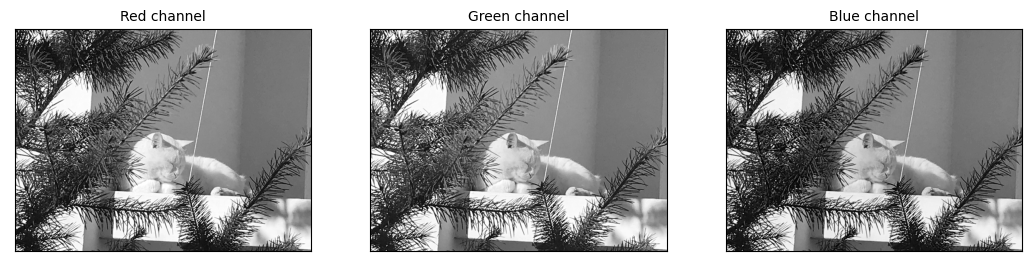

In [14]:
# for all three channels
cat_image_red, cat_image_green, cat_image_blue = [white_cat_image[:, :, i] for i in range(3)]

# same as fig, ax but for all at once
figure, (ax_red, ax_green, ax_blue) = plt.subplots(1, 3, figsize = (13, 8))

ax_red.imshow(cat_image_red, cmap = "gray")
ax_red.set_title("Red channel", size = "10")

ax_green.imshow(cat_image_green, cmap = "gray")
ax_green.set_title("Green channel", size = "10")

ax_blue.imshow(cat_image_blue, cmap = "gray")
ax_blue.set_title("Blue channel", size = "10")

plt.setp([ax_red, ax_green, ax_blue], xticks = [], yticks = [])       # Remove axis ticks

plt.show()

Grey color is one in which all components have equal intensity. A channel is the greyscale image made of just one primary color (as shown above). The greyscale images are single-channeled images in which each pixel carries only information about the intensity of light. These images are exclusively made by shades of grey. But, please, do not confuse greyscale images with binary images (black and white images) which contain only black and white pixels.

Each color in RGB-space can be defined by a vector in the 3D colorspace. The intensity is given by the length of the vector and the actual color by the two angles describing the orientation of the vector in the colorspace. A histogram gives us information how bright our image is:
- on the $x$-axis are pixel values from 0 to 255
- on the $y$-axis is the count of all values

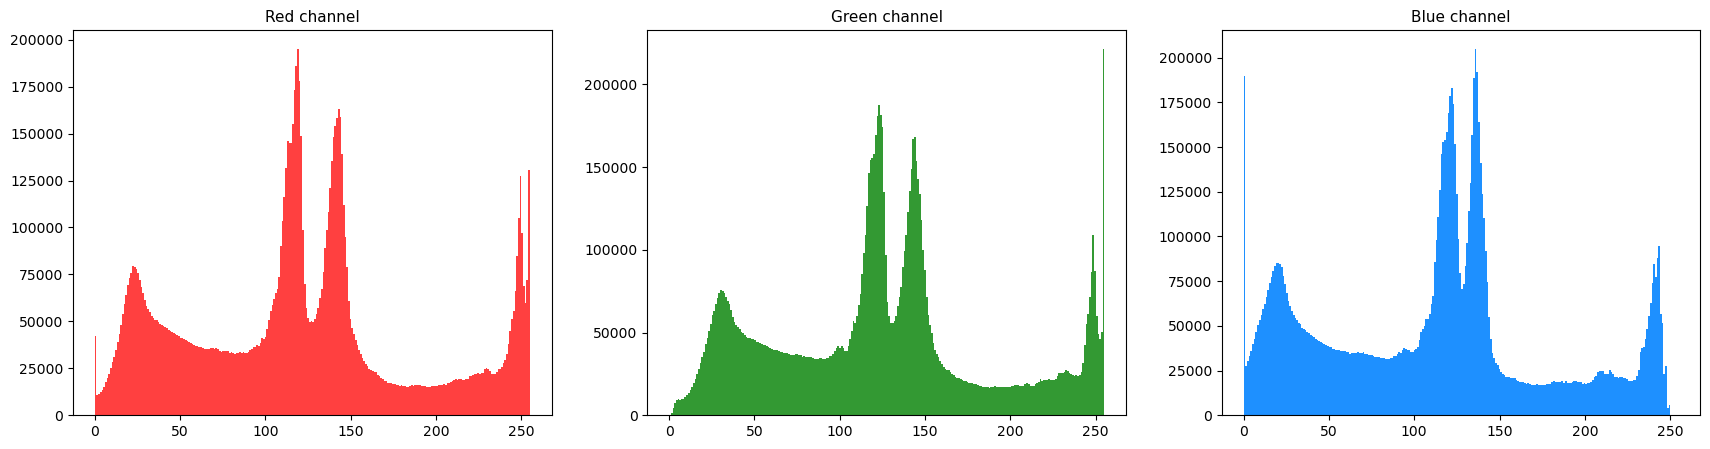

In [15]:
plt.figure(figsize = (21, 5))

rows = 1
columns = 3

plt.subplot(rows, columns, 1)
hist_vector_r = cat_image_red.ravel()
plt.hist(hist_vector_r, bins = 256, color = "red", alpha = 0.75)
plt.title("Red channel", size = "11")

plt.subplot(rows, columns, 2)
hist_vector_g = cat_image_green.ravel()
plt.hist(hist_vector_g, bins = 256, color = "green", alpha = 0.8)
plt.title("Green channel", size = "11")

plt.subplot(rows, columns, 3)
hist_vector_b = cat_image_blue.ravel()
plt.hist(hist_vector_b, bins = 256, color = "dodgerblue")
plt.title("Blue channel", size = "11")

plt.show()

A histogram shows the number of pixels of each brightness in the image. The taller the peak, the more pixels of that brightness in the image. If we read properly the histogram, we read the whole image story. In this case, we have a balanced histogram. As Oblaka used to be.

___________________________________________________________________________________________________________________________